# 의사결정트리(Decision Tree)

> 스무고개

- 머신러닝 기법 중 `지도학습`
- 의사결정 규칙을 나무 구조로 도표화해 분류와 예측을 수행
- 장점 : 결과가 이해하기 쉽고 직관적이다. 결과에 대한 원인 걸명이 필요한 경우 많이 사용
- 단점 : 과적합 가능성이 매우 크기 때문에 정확도가 떨어진다.

![tree](res/tree.png)
![tree](res/tree2.png)

## 사용 예시

- 은행에서 대출 가능여부 판단
- 환자가 어떠한 조건에 부합하여 병에 걸렸는가에 대한 내용

## #01. 패키지

In [28]:
from matplotlib import pyplot as plt
from pandas import read_excel
import sys
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_text, export_graphviz, plot_tree
# `export_graphviz`함수는 내부적으로 `graphviz` 패키지에 의존하고 있기 때문에 `graphviz`를 먼저 설치
from subprocess import check_call
import graphviz
import dtreeviz
from plotnine import *

## #02. 데이터

In [29]:
origin = read_excel("https://data.hossam.kr/G02/iris.xlsx")
print(origin.info())
origin.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB
None


,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [30]:
origin['Species'].value_counts()

Species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

## #03. 데이터 분할

`지도학습`인 만큼 데이터 분할이 필요

In [31]:
origin.columns

Index(['Sepal.Length', 'Sepal.Width', 'Petal.Length', 'Petal.Width',
       'Species'],
      dtype='object')

In [32]:
x = origin.drop('Species', axis=1)
y = origin['Species'].map({"setosa":0, "versicolor":1, "virginica":2})
x.shape, y.shape

((150, 4), (150,))

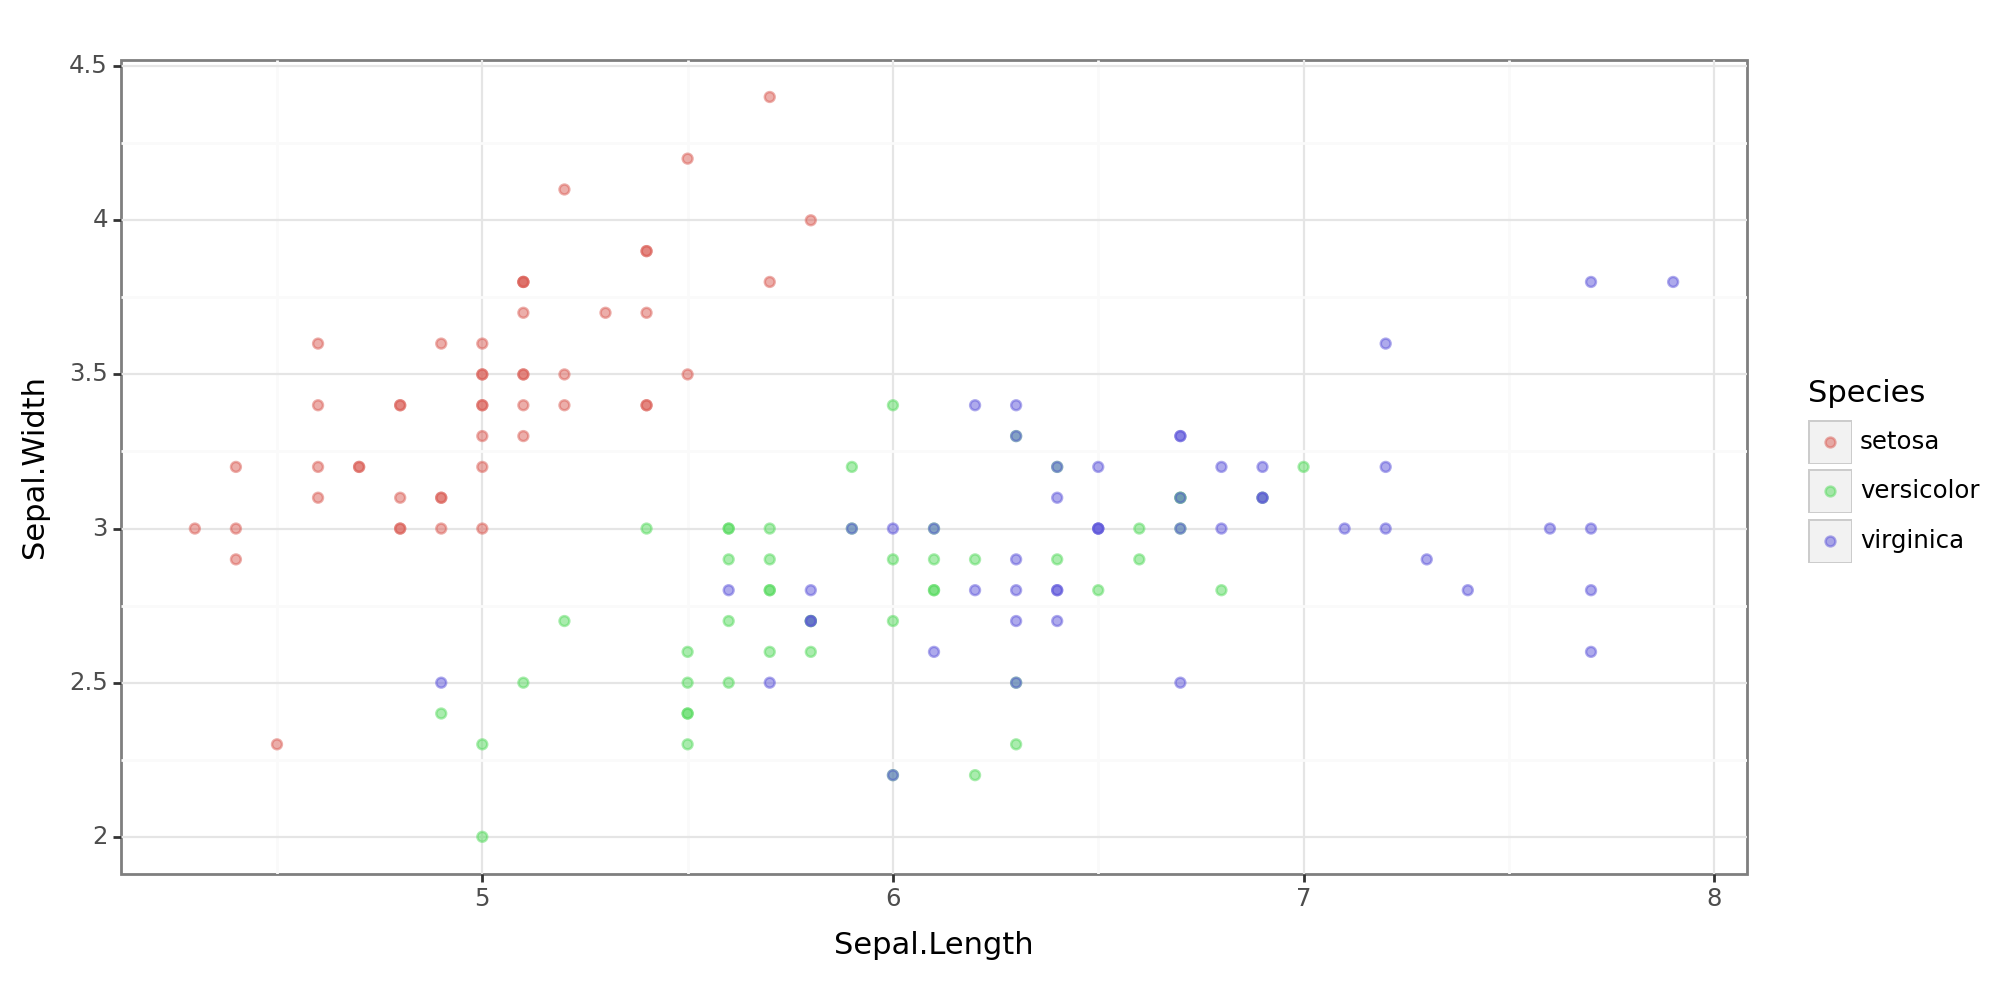

<Figure Size: (1000 x 500)>

In [33]:
ggplot(data=origin, mapping=aes(x='Sepal.Length', y='Sepal.Width', color='Species')) + geom_point(alpha=0.5) + theme_bw() + theme(figure_size=(10, 5))

## #04. 학습모델 구현

In [34]:
dtree = DecisionTreeClassifier(random_state=777, max_depth=3)
dtree.fit(x.values,y)  #학습

DecisionTreeClassifier(max_depth=3, random_state=777)

### 결과 확인

In [35]:
et = export_text(dtree,
                 feature_names=list(x.columns),
                 class_names = ['setosa', 'versicolor', 'virginica'])
print(et)

|--- Petal.Width <= 0.80
|   |--- class: setosa
|--- Petal.Width >  0.80
|   |--- Petal.Width <= 1.75
|   |   |--- Petal.Length <= 4.95
|   |   |   |--- class: versicolor
|   |   |--- Petal.Length >  4.95
|   |   |   |--- class: virginica
|   |--- Petal.Width >  1.75
|   |   |--- Petal.Length <= 4.85
|   |   |   |--- class: virginica
|   |   |--- Petal.Length >  4.85
|   |   |   |--- class: virginica



### 그래픽 시각화

#### 1. Graphivz

Graphivz 설치

1. https://graphviz.org/download/ 페이지에서 windows 64bit installer 파일을 내려받아 설치 
    - 설치 과정 중 install Options 페이지에서 두 번째 항목 선택 시 PATH 설정이 자동으로 처리
    
![path0](res/path0.png)

2. 만약 설치 과정 중 PATH 자동 설정이 수행되지 않으면 설치 후 C:\Program Files\Graphviz\bin 경로를 시스템 환경변수 PATH에 추가

![path1](res/path1.png)

![path2](res/path2.png)

3. 설치가 완료되면 VSCode 재실행

In [36]:
# sys.path.append("C:/Program Files/Graphviz")

export_graphviz(dtree,
                out_file='iris.dot',
                feature_names=list(x.columns),
                class_names = ['setosa', 'versicolor', 'virginica'],
                rounded=True, #노드의 모서리 둥글게
                filled=True, #노드의 색상을 다르게
                fontname="Malgun Gothic"
                )
# iris.dot 파일 생성 후 해당 파일을 png로 바꿔줘야함

# # 명령 프롬프트 파라미터 양식1
check_call(['dot', '-Tpng', 'iris.dot', '-o', 'iris.png'])

# # 명령 프롬프트 파라미터 양식2
# with open("iris.dot") as f:
#     dot = f.read()
#     display(graphviz.Source(dot))

0

#### 2. plot_tree

기본 파라미터는 export_text 함수와 동일

pyplot을 통해 출력

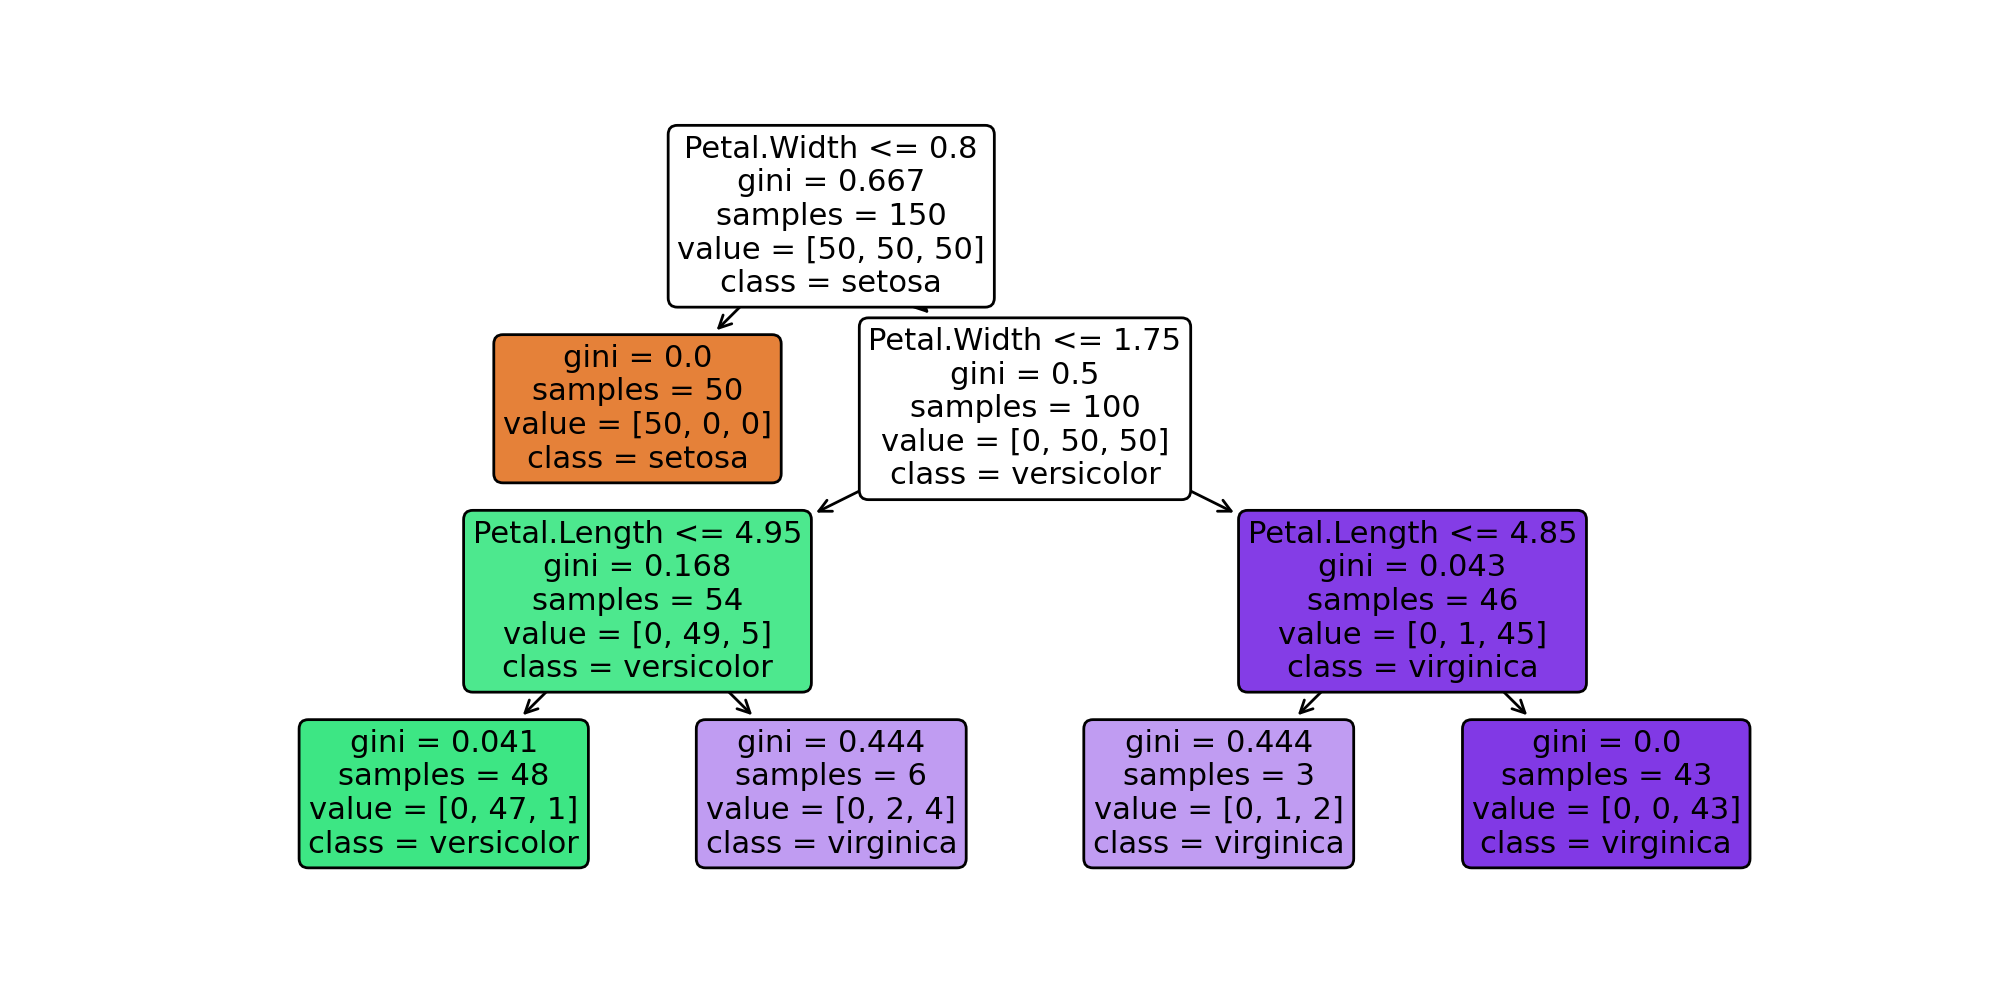

In [37]:
plt.figure(figsize=(10, 5))

# 리턴을 안받으면 그래프가 2개 출력된다. 리턴값을 따로 사용할 것이 아니므로 _로 받는다.
_ = plot_tree(dtree,
              feature_names=list(x.columns),
              class_names=['setosa', 'versicolor', 'virginica'],
              rounded=True, # 노드의 모서리를 둥글게
              filled=True    # 노드의 색상을 다르게
              )
plt.show()
plt.close()

#### 3. dtreeviz

`dtreeviz`패키지 설치와 참조가 필요

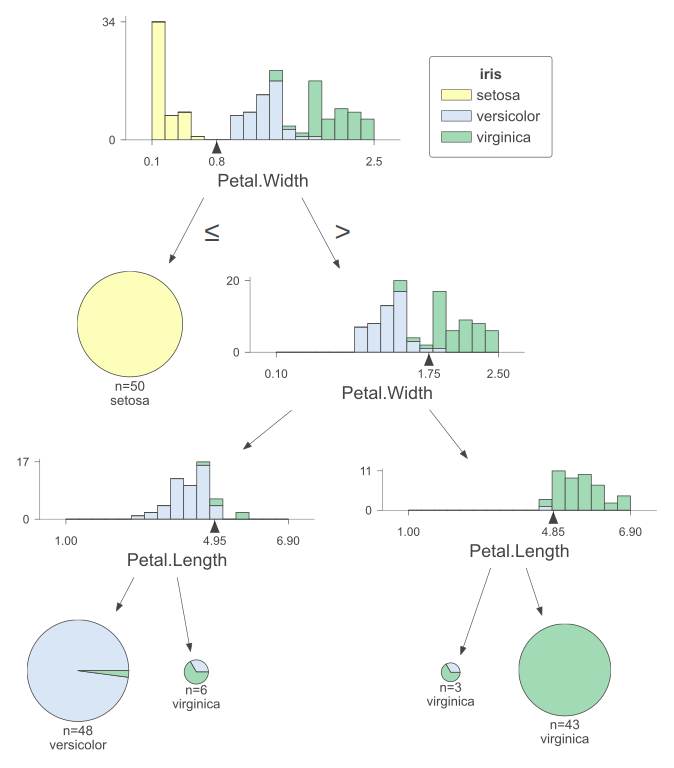

In [38]:
viz = dtreeviz.model(dtree,
                     X_train=x,
                     y_train=y,
                     target_name="iris",
                     feature_names=list(origin.columns[:-1]),
                     class_names=['setosa', 'versicolor', 'virginica'])
viz.view(scale = 2.0)